<a href="https://colab.research.google.com/github/Eric1891/Micro-Credential-winter-2022/blob/main/Day_7_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
prop =pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/property.csv')

In [ ]:
prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
new_prop = prop.set_index('PID')

In [ ]:
new_prop.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,NaN,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
new_prop.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9 entries, 100001000.0 to 100009000.0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ST_NUM        7 non-null      float64
 1   ST_NAME       9 non-null      object 
 2   OWN_OCCUPIED  8 non-null      object 
 3   NUM_BEDROOMS  9 non-null      object 
 4   NUM_BATH      8 non-null      object 
 5   SQ_FT         8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 504.0+ bytes


In [ ]:
new_prop['NUM_BEDROOMS'].str.isnumeric()

PID
100001000.0     True
100002000.0     True
100003000.0      NaN
100004000.0     True
NaN             True
100006000.0      NaN
100007000.0     True
100008000.0     True
100009000.0    False
Name: NUM_BEDROOMS, dtype: object

In [ ]:
new_prop['NUM_BEDROOMS'] = new_prop['NUM_BEDROOMS'].fillna(0)
new_prop['SQ_FT'] = new_prop['SQ_FT'].fillna(0)

In [ ]:
new_prop

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,0,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600
100006000.0,207.0,BERKELEY,Y,0,1,800
100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
100008000.0,213.0,TREMONT,Y,1,1,0
100009000.0,215.0,TREMONT,Y,na,2,1800


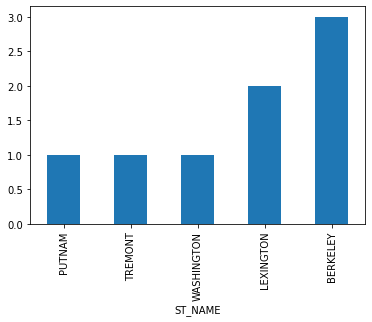

In [ ]:
new_prop.groupby(['ST_NAME'])['SQ_FT'].count().sort_values(ascending = True).plot(kind='bar')

#Rates second data set

In [ ]:
rates = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')


In [ ]:
rates

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR
5,California,https://electionresults.sos.ca.gov/,Unofficial,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",NaN,CA
6,Colorado,https://results.enr.clarityelections.com/CO/10...,NaN,"3,295,000",NaN,76.4%,"4,313,054","4,595,504",5.7%,"18,905",0,0,"18,905",NaN,CO
7,Connecticut,NaN,NaN,"1,850,000",NaN,71.1%,"2,603,327","2,839,560",7.7%,"13,268",0,"4,452","17,720",NaN,CT
8,Delaware,https://elections.delaware.gov/results/html/in...,Unofficial,"507,805","502,392",70.5%,"720,531","780,822",5.8%,"5,874","14,176",350,"15,013",NaN,DE
9,District of Columbia,https://electionresults.dcboe.org/election_res...,NaN,"350,000",NaN,64.7%,"540,685","582,065",7.1%,0,0,0,0,NaN,DC


In [ ]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                52 non-null     object
 1   Source                               40 non-null     object
 2   Official/Unofficial                  25 non-null     object
 3   Total Ballots Counted (Estimate)     52 non-null     object
 4   Vote for Highest Office (President)  24 non-null     object
 5   VEP Turnout Rate                     52 non-null     object
 6   Voting-Eligible Population (VEP)     52 non-null     object
 7   Voting-Age Population (VAP)          52 non-null     object
 8   % Non-citizen                        52 non-null     object
 9   Prison                               52 non-null     object
 10  Probation                            52 non-null     object
 11  Parole                               52 non-nul

In [ ]:
rates.columns

Index(['State', 'Source', 'Official/Unofficial',
       'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

In [ ]:
columns_to_be_dropped = ['Official/Unofficial', 'Overseas Eligible','Prison', 'Probation', 'Parole']

In [ ]:
rates.drop(columns_to_be_dropped, axis=1, inplace=True)

In [ ]:
rates.head()

,State,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Total Ineligible Felon,State Abv
0,United States,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"3,294,457",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"67,782",AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"6,927",AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"93,699",AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"64,974",AR


In [ ]:
#set state as an index
new_rates = rates.set_index('State')

In [ ]:
new_rates.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Total Ineligible Felon,State Abv
State,,,,,,,,,
United States,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"3,294,457",NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"67,782",AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"6,927",AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"93,699",AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"64,974",AR


In [ ]:
new_rates['Vote for Highest Office (President)'].str.isnumeric()

State
United States             NaN
Alabama                 False
Alaska                    NaN
Arizona                   NaN
Arkansas                False
California                NaN
Colorado                  NaN
Connecticut               NaN
Delaware                False
District of Columbia      NaN
Florida                   NaN
Georgia                   NaN
Hawaii                  False
Idaho                   False
Illinois                  NaN
Indiana                   NaN
Iowa                      NaN
Kansas                  False
Kentucky                False
Louisiana               False
Maine                     NaN
Maryland                  NaN
Massachusetts             NaN
Michigan                False
Minnesota               False
Mississippi               NaN
Missouri                False
Montana                 False
Nebraska                False
Nevada                    NaN
New Hampshire           False
New Jersey                NaN
New Mexico              False
New 

In [ ]:
new_rates['Vote for Highest Office (President)'] = new_rates['Vote for Highest Office (President)'].fillna(0)

In [ ]:
new_rates.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Total Ineligible Felon,State Abv
State,,,,,,,,,
United States,NaN,"158,835,004",0,66.4%,"239,247,182","257,605,088",7.8%,"3,294,457",NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"67,782",AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",0,69.8%,"525,568","551,117",3.4%,"6,927",AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",0,65.5%,"5,189,000","5,798,473",8.9%,"93,699",AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"64,974",AR


In [ ]:
new_rates.loc['New York']

Source                                        NaN
Total Ballots Counted (Estimate)        8,930,000
Vote for Highest Office (President)             0
VEP Turnout Rate                            65.3%
Voting-Eligible Population (VEP)       13,670,596
Voting-Age Population (VAP)            15,372,655
% Non-citizen                               10.5%
Total Ineligible Felon                     87,600
State Abv                                      NY
Name: New York, dtype: object

In [ ]:
new_rates.loc['California']

Source                                 https://electionresults.sos.ca.gov/
Total Ballots Counted (Estimate)                                16,800,000
Vote for Highest Office (President)                                      0
VEP Turnout Rate                                                     64.7%
Voting-Eligible Population (VEP)                                25,962,648
Voting-Age Population (VAP)                                     30,783,255
% Non-citizen                                                        15.0%
Total Ineligible Felon                                             207,316
State Abv                                                               CA
Name: California, dtype: object

##What is the state with more non-citizen

In [ ]:
rates.columns

Index(['State', 'Source', 'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Total Ineligible Felon', 'State Abv'],
      dtype='object')

In [ ]:
df = new_rates.copy()

In [ ]:
df['% Non-citizen'].str.strip('%')

State
United States            7.8
Alabama                  2.3
Alaska                   3.4
Arizona                  8.9
Arkansas                 3.6
California              15.0
Colorado                 5.7
Connecticut              7.7
Delaware                 5.8
District of Columbia     7.1
Florida                 10.1
Georgia                  6.6
Hawaii                   9.1
Idaho                    4.1
Illinois                 7.8
Indiana                  3.6
Iowa                     3.5
Kansas                   4.9
Kentucky                 2.8
Louisiana                2.8
Maine                    1.7
Maryland                 8.4
Massachusetts            8.7
Michigan                 3.6
Minnesota                4.1
Mississippi              1.4
Missouri                 2.4
Montana                  1.2
Nebraska                 4.8
Nevada                  11.6
New Hampshire            3.0
New Jersey              11.1
New Mexico               6.2
New York                10.5
North Ca

In [ ]:
df = df.convert_dtypes()
df.dtypes

Source                                 string
Total Ballots Counted (Estimate)       string
Vote for Highest Office (President)    object
VEP Turnout Rate                       string
Voting-Eligible Population (VEP)       string
Voting-Age Population (VAP)            string
% Non-citizen                          string
Total Ineligible Felon                 string
State Abv                              string
dtype: object

In [ ]:
regex_val = r'^([-+]?[0-9]*\.?[0-9]+)'

In [ ]:
df['% Non-citizen'] = df['% Non-citizen'].str.extract(regex_val, expand=False)

In [ ]:
df['% Non-citizen'] = df['% Non-citizen'].astype(float)

In [ ]:
df.nlargest(2,'% Non-citizen')

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Total Ineligible Felon,State Abv
State,,,,,,,,,
California,https://electionresults.sos.ca.gov/,"16,800,000",0,64.7%,"25,962,648","30,783,255",15.0,"207,316",CA
Texas,https://results.texas-election.com/races,"11,300,000","11,231,799",60.2%,"18,784,280","22,058,260",12.6,"492,390",TX


In [ ]:
df.dtypes

Source                                  string
Total Ballots Counted (Estimate)        string
Vote for Highest Office (President)     object
VEP Turnout Rate                        string
Voting-Eligible Population (VEP)        string
Voting-Age Population (VAP)             string
% Non-citizen                          float64
Total Ineligible Felon                  string
State Abv                               string
dtype: object

In [ ]:
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].str.extract(regex_val, expand=False)
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].astype(float)

In [ ]:
df_new = df.copy()

In [ ]:
df_new['Total Ballots Counted (Estimate)'] = df_new['Total Ballots Counted (Estimate)'].str.replace(",","").astype(int)
df_new['Vote for Highest Office (President)'] = df_new['Vote for Highest Office (President)'].str.replace(",","").astype(float)
df_new['Voting-Eligible Population (VEP)'] = df_new['Voting-Eligible Population (VEP)'].str.replace(",","").astype(int)
df_new['Voting-Age Population (VAP)'] = df_new['Voting-Age Population (VAP)'].str.replace(",","").astype(int)
df_new['Total Ineligible Felon'] = df_new['Total Ineligible Felon'].str.replace(",","").astype(int)

In [ ]:
df_new.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Total Ineligible Felon,State Abv
State,,,,,,,,,
United States,<NA>,158835004,NaN,66.4,239247182,257605088,7.8,3294457,<NA>
Alabama,https://www2.alabamavotes.gov/electionnight/st...,2306587,2297295.0,62.6,3683055,3837540,2.3,67782,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,367000,NaN,69.8,525568,551117,3.4,6927,AK
Arizona,https://results.arizona.vote/#/featured/18/0,3400000,NaN,65.5,5189000,5798473,8.9,93699,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,1212030,1206697.0,55.5,2182375,2331171,3.6,64974,AR


In [ ]:
df.dtypes

Source                                  string
Total Ballots Counted (Estimate)        string
Vote for Highest Office (President)     object
VEP Turnout Rate                       float64
Voting-Eligible Population (VEP)        string
Voting-Age Population (VAP)             string
% Non-citizen                          float64
Total Ineligible Felon                  string
State Abv                               string
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


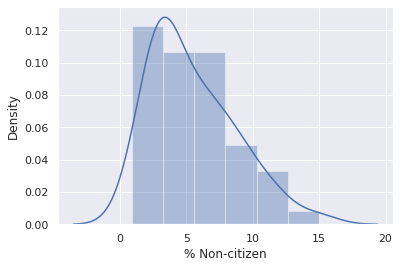

In [ ]:
sns.distplot(df_new['% Non-citizen'])

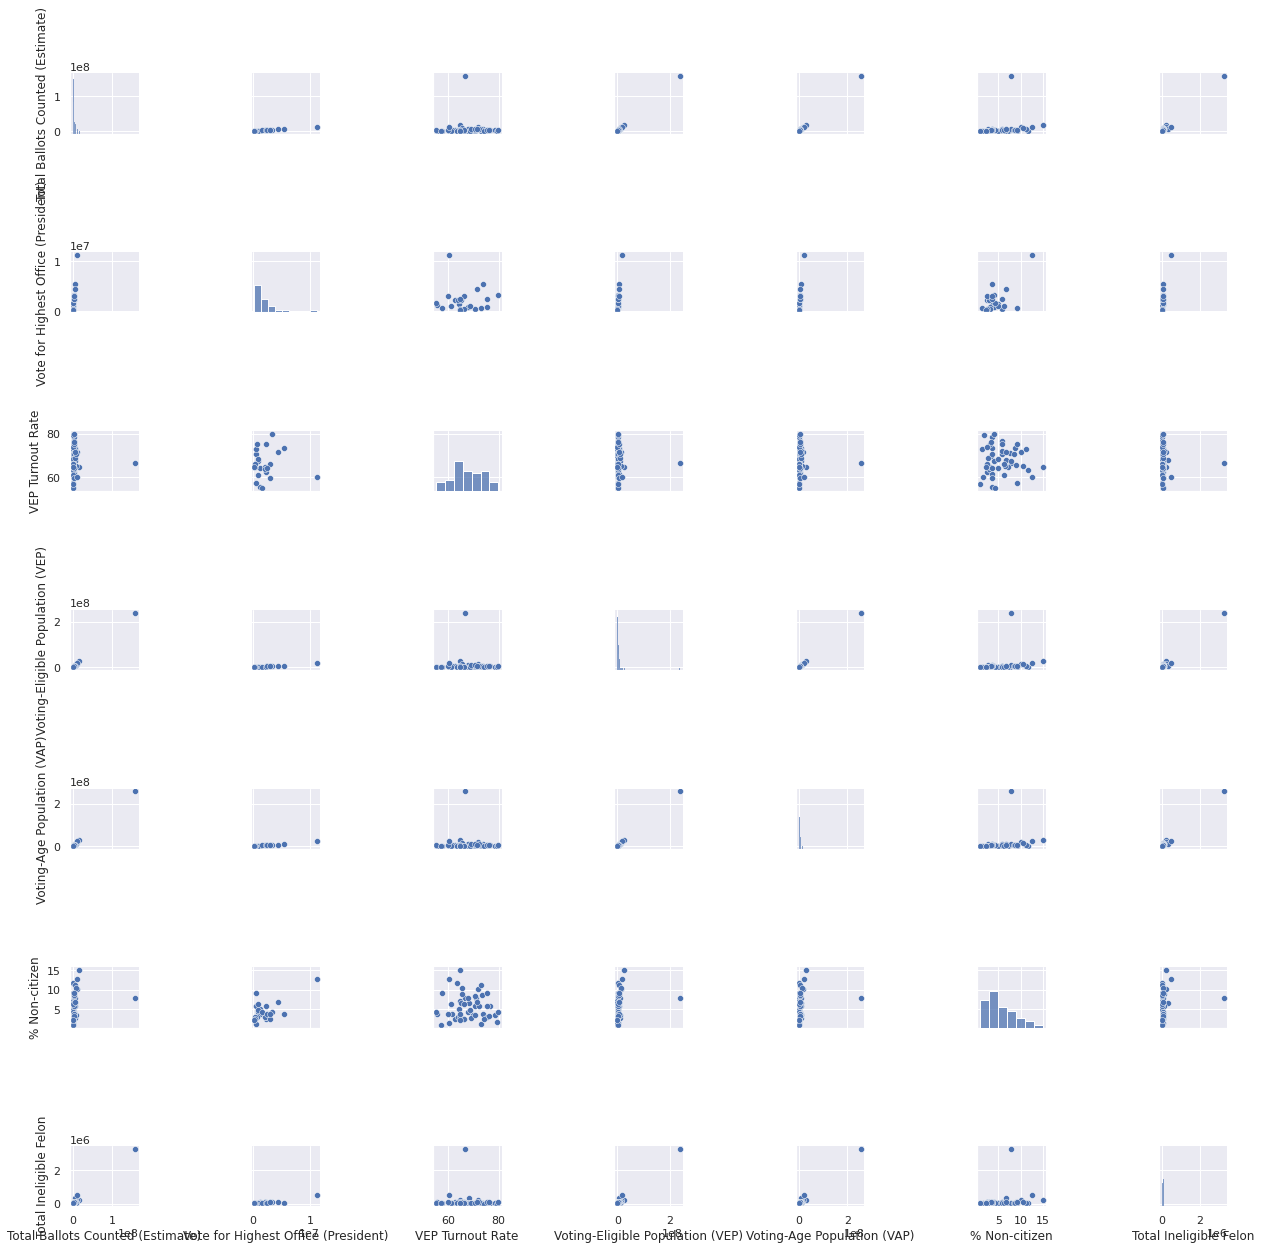

In [ ]:
sns.pairplot(df_new)

In [ ]:
df_new.columns

Index(['Source', 'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Total Ineligible Felon', 'State Abv'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


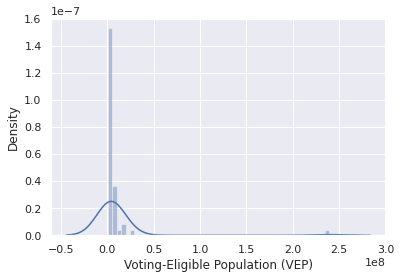

In [ ]:
sns.distplot(df_new['Voting-Eligible Population (VEP)'])

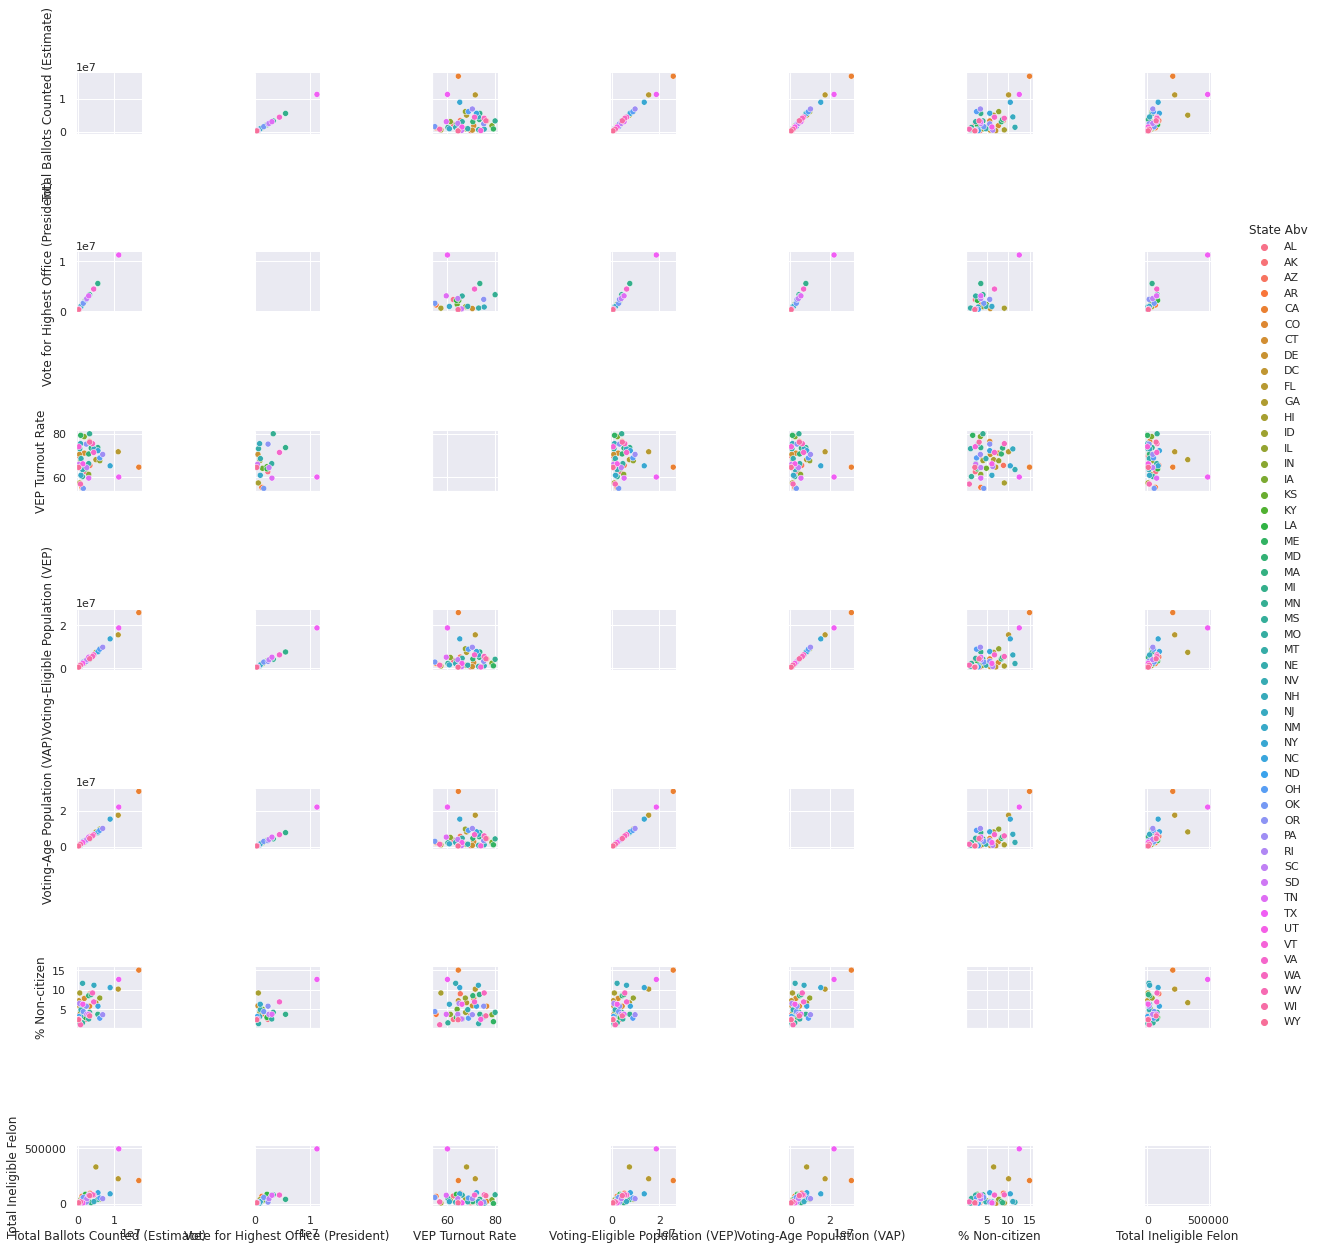

In [ ]:
sns.pairplot(df_new, hue='State Abv')

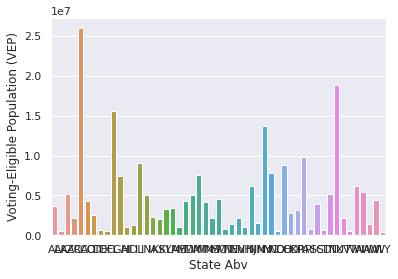

In [ ]:
sns.barplot(x='State Abv', y='Voting-Eligible Population (VEP)', data=df_new)